In [14]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

In [15]:
# 1. Load dataset
df = pd.read_csv("data.csv")

# Assume last column is target, first two columns are features
X = df.iloc[:, :2].values
y = df.iloc[:, -1].values



In [17]:
# Encode target labels M/B → 1/0
le = LabelEncoder()
y = le.fit_transform(df["diagnosis"])


In [18]:
# Remove rows with missing values
mask = ~np.isnan(X).any(axis=1)
X = X[mask]
y = y[mask]

In [21]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [22]:
# 2. TRAIN MODELS
pipe_linear = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="linear"))
])

pipe_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf"))
])

pipe_linear.fit(X_train, y_train)
pipe_rbf.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [23]:
# 3. HYPERPARAMETER TUNING
param_grid = {
    "svc__C": [0.1, 1, 10],
    "svc__gamma": [0.01, 0.1, 1]
}

grid = GridSearchCV(pipe_rbf, param_grid, cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10], 'svc__gamma': [0.01, 0.1, 1]})

In [24]:
# 4. DECISION BOUNDARY PLOT FUNCTION
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
    plt.xlabel("radius_mean")
    plt.ylabel("texture_mean")
    plt.title(title)
    plt.show()

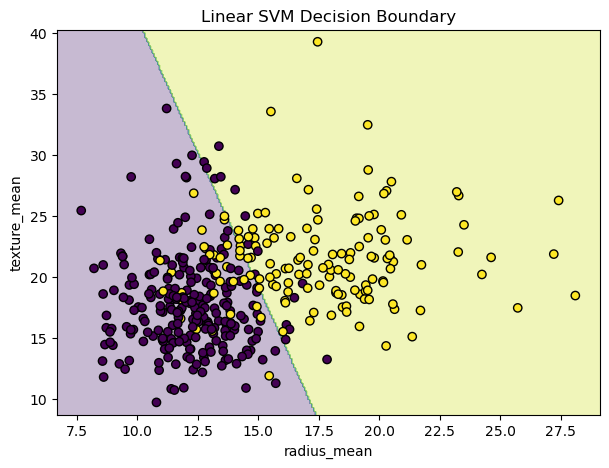

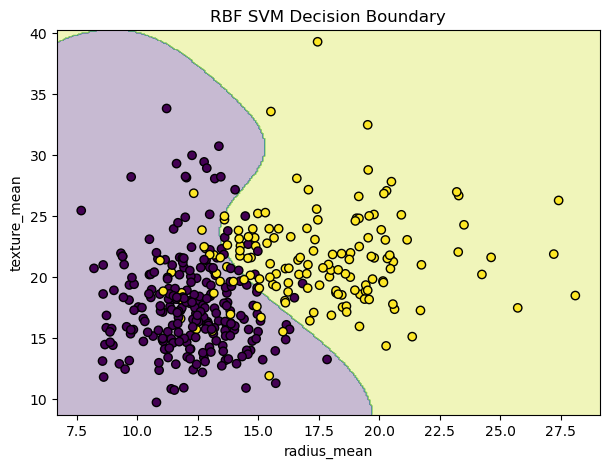

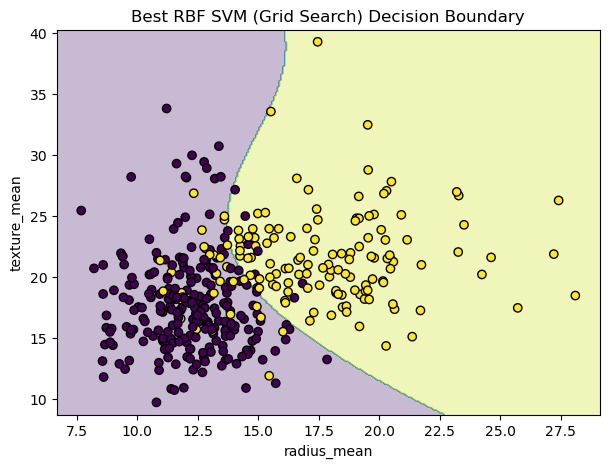

In [25]:
# 5. VISUALIZE DECISION BOUNDARIES
plot_decision_boundary(pipe_linear, X_train, y_train, "Linear SVM Decision Boundary")
plot_decision_boundary(pipe_rbf, X_train, y_train, "RBF SVM Decision Boundary")
plot_decision_boundary(grid.best_estimator_, X_train, y_train,
                       "Best RBF SVM (Grid Search) Decision Boundary")




In [26]:

# 6. PRINT PERFORMANCE
print("---- PERFORMANCE ----")
print("Linear SVM Train Accuracy:", pipe_linear.score(X_train, y_train))
print("Linear SVM Test Accuracy:", pipe_linear.score(X_test, y_test))
print("RBF SVM Train Accuracy:", pipe_rbf.score(X_train, y_train))
print("RBF SVM Test Accuracy:", pipe_rbf.score(X_test, y_test))
print("Best Params from Grid Search:", grid.best_params_)
print("Best RBF Train Accuracy:", grid.best_estimator_.score(X_train, y_train))
print("Best RBF Test Accuracy:", grid.best_estimator_.score(X_test, y_test))


---- PERFORMANCE ----
Linear SVM Train Accuracy: 0.8819095477386935
Linear SVM Test Accuracy: 0.9005847953216374
RBF SVM Train Accuracy: 0.9120603015075377
RBF SVM Test Accuracy: 0.9064327485380117
Best Params from Grid Search: {'svc__C': 1, 'svc__gamma': 0.1}
Best RBF Train Accuracy: 0.9045226130653267
Best RBF Test Accuracy: 0.9122807017543859
